<a href="https://colab.research.google.com/github/KeshavAman/House-price-prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libaries**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import plotting

**Importing dataset**

In [36]:
dataset = pd.read_csv('https://raw.githubusercontent.com/KeshavAman/file/main/HousingData.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [37]:
print('Rows and columns :',dataset.shape)

Rows and columns : (506, 14)


In [38]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Plot figure**

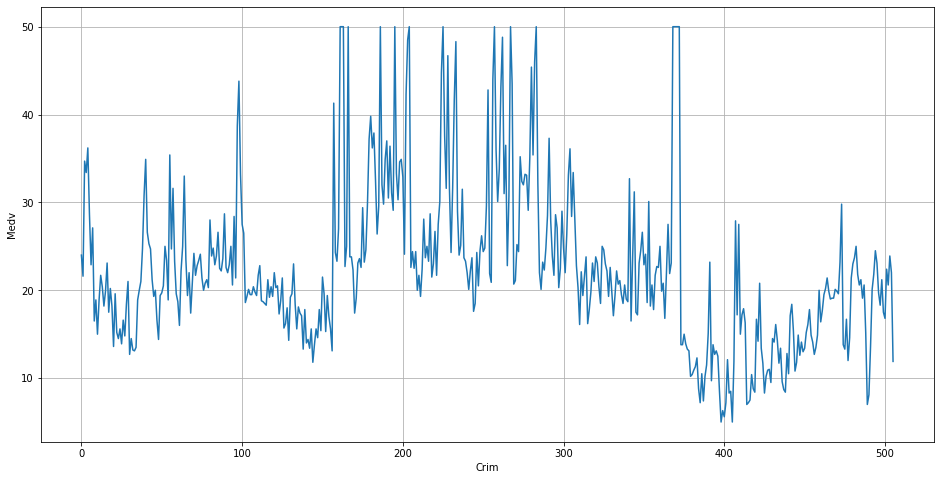

In [39]:
plt.figure(figsize = (16,8))

plt.grid(True)
plt.xlabel('Crim')
plt.ylabel('Medv')
plt.plot(dataset['MEDV'])
plt.show()

**Pairplot**

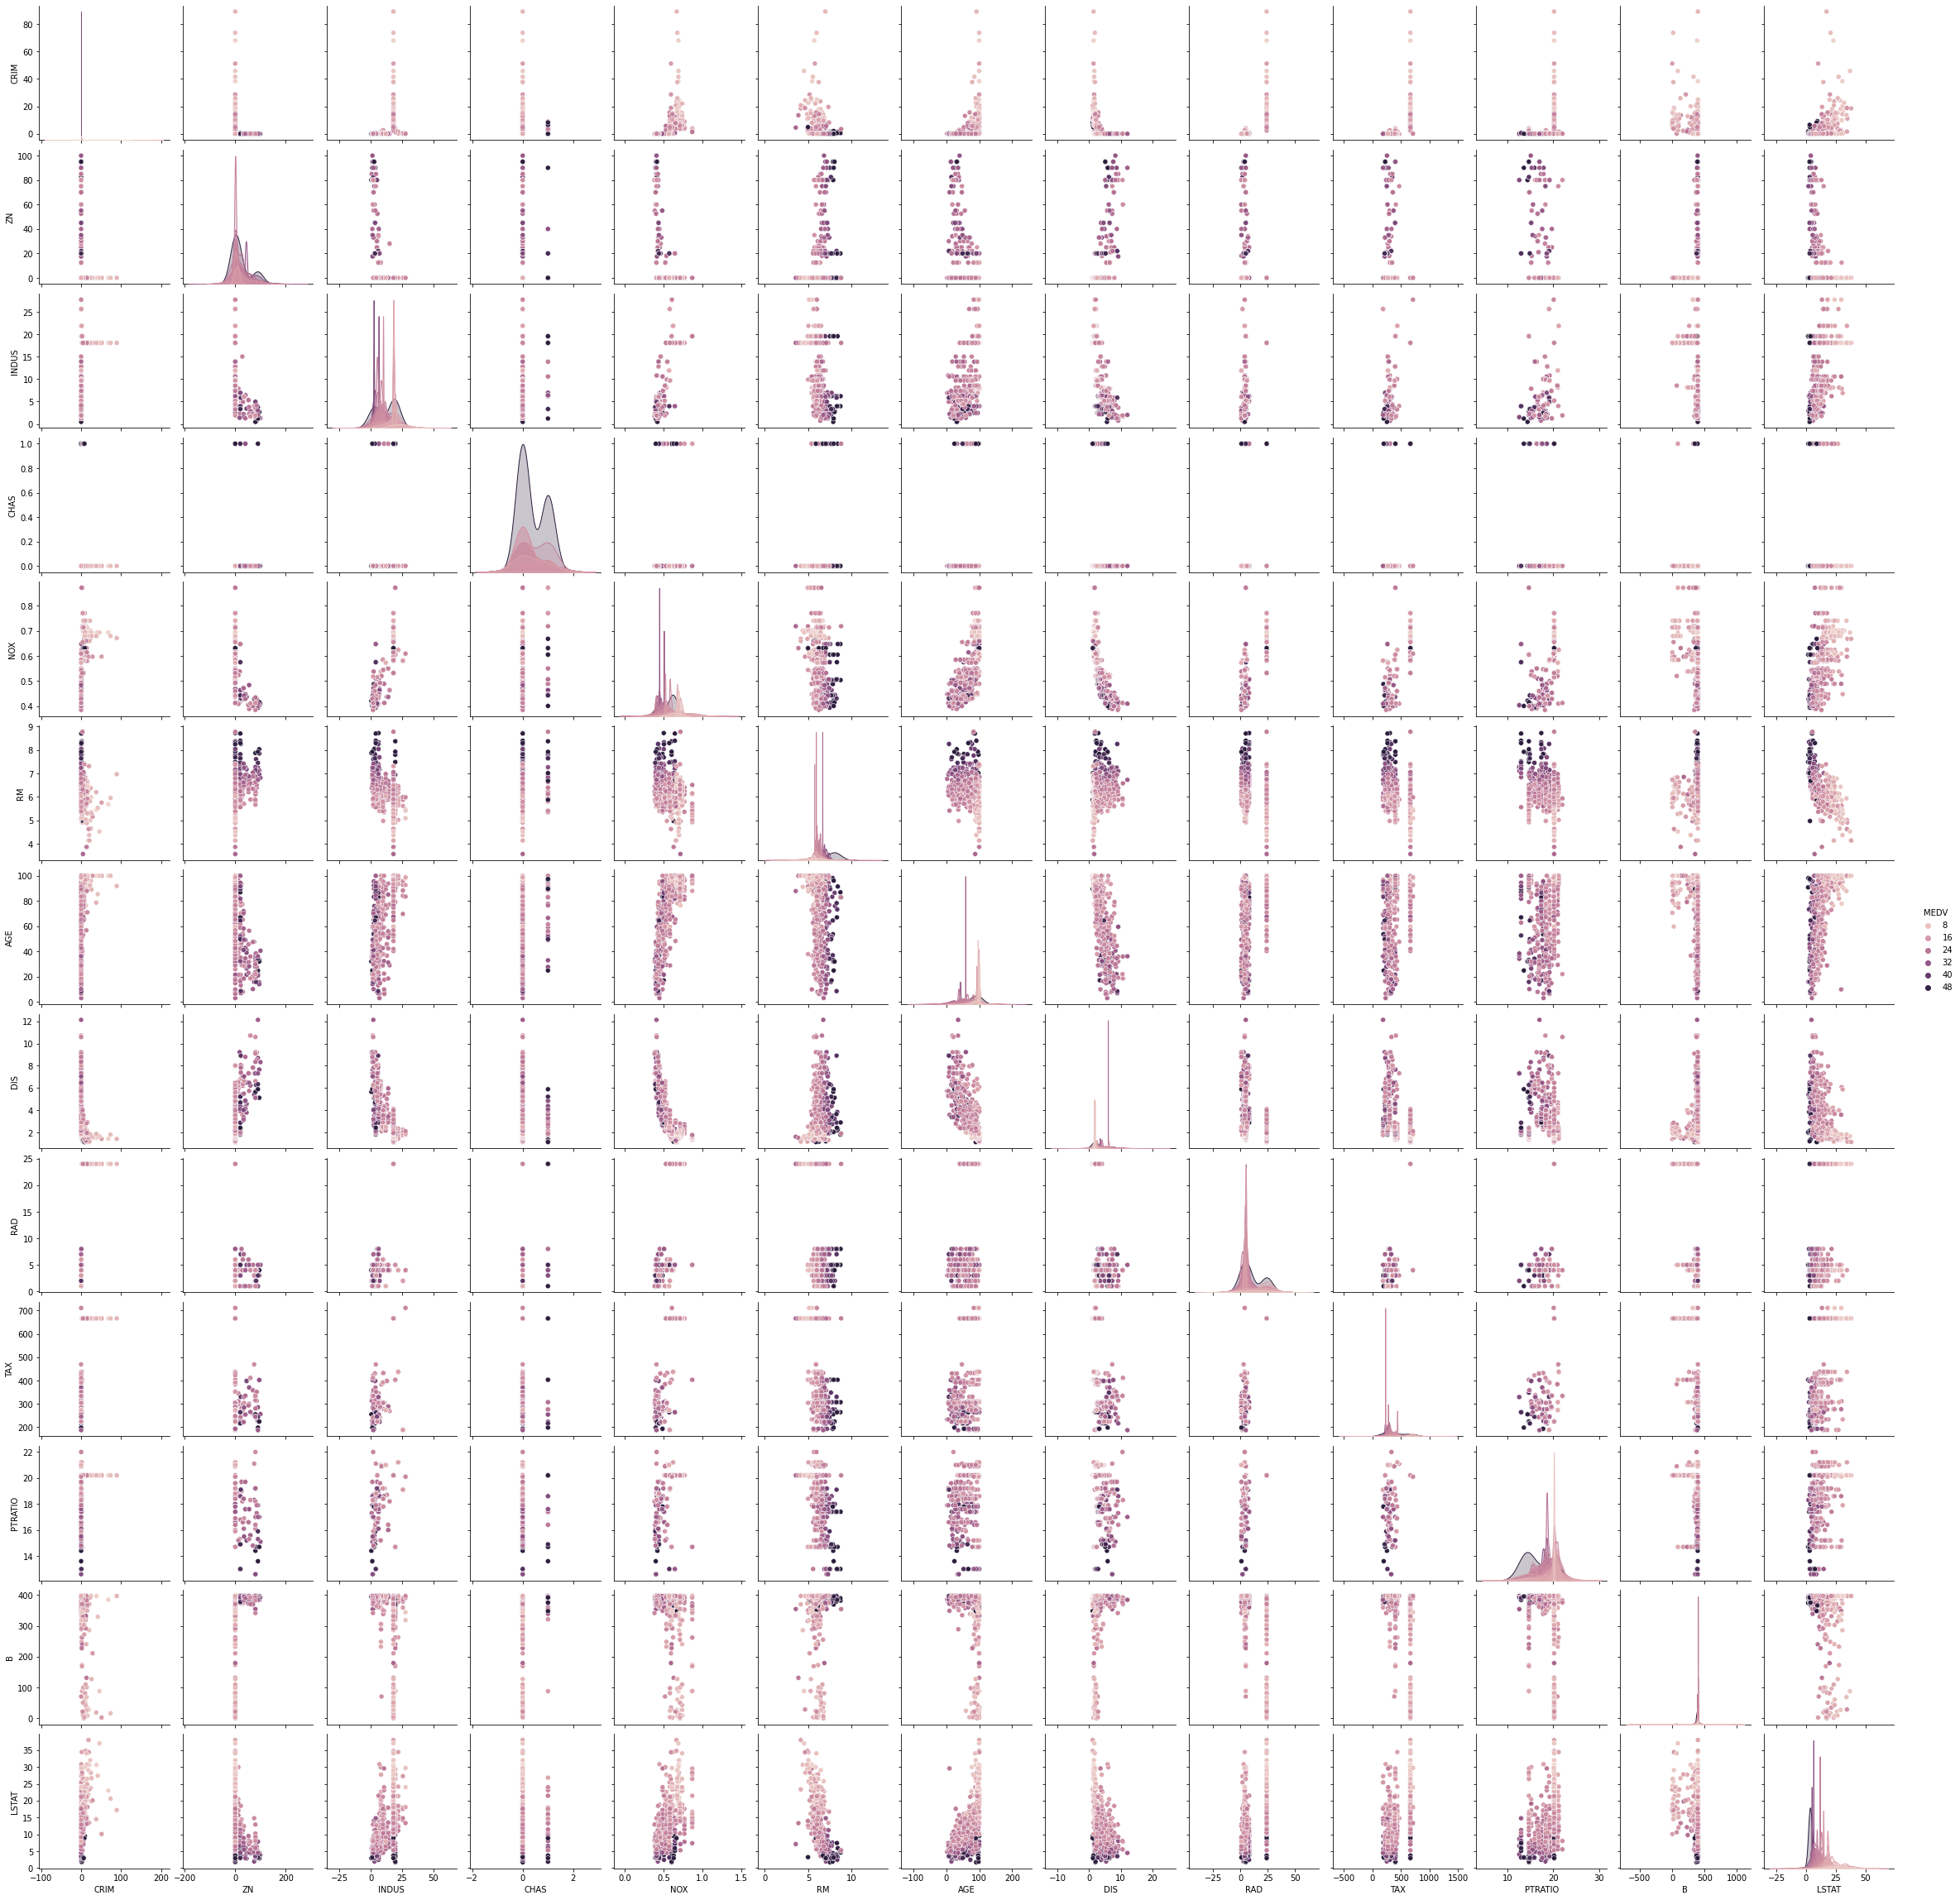

In [40]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(dataset, hue = 'MEDV')

**Heatmap**

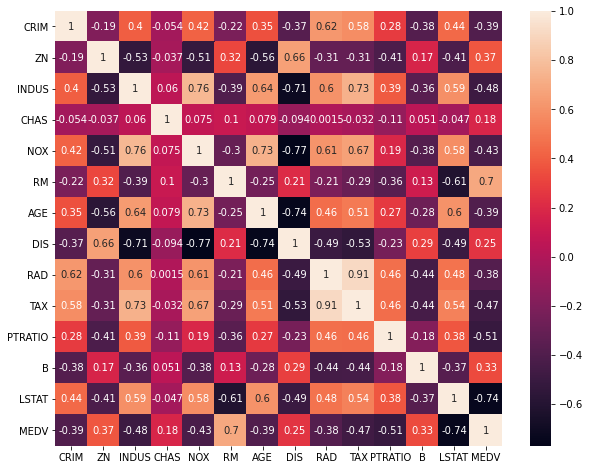

In [41]:
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(), annot = True)

**Andrews Curves**

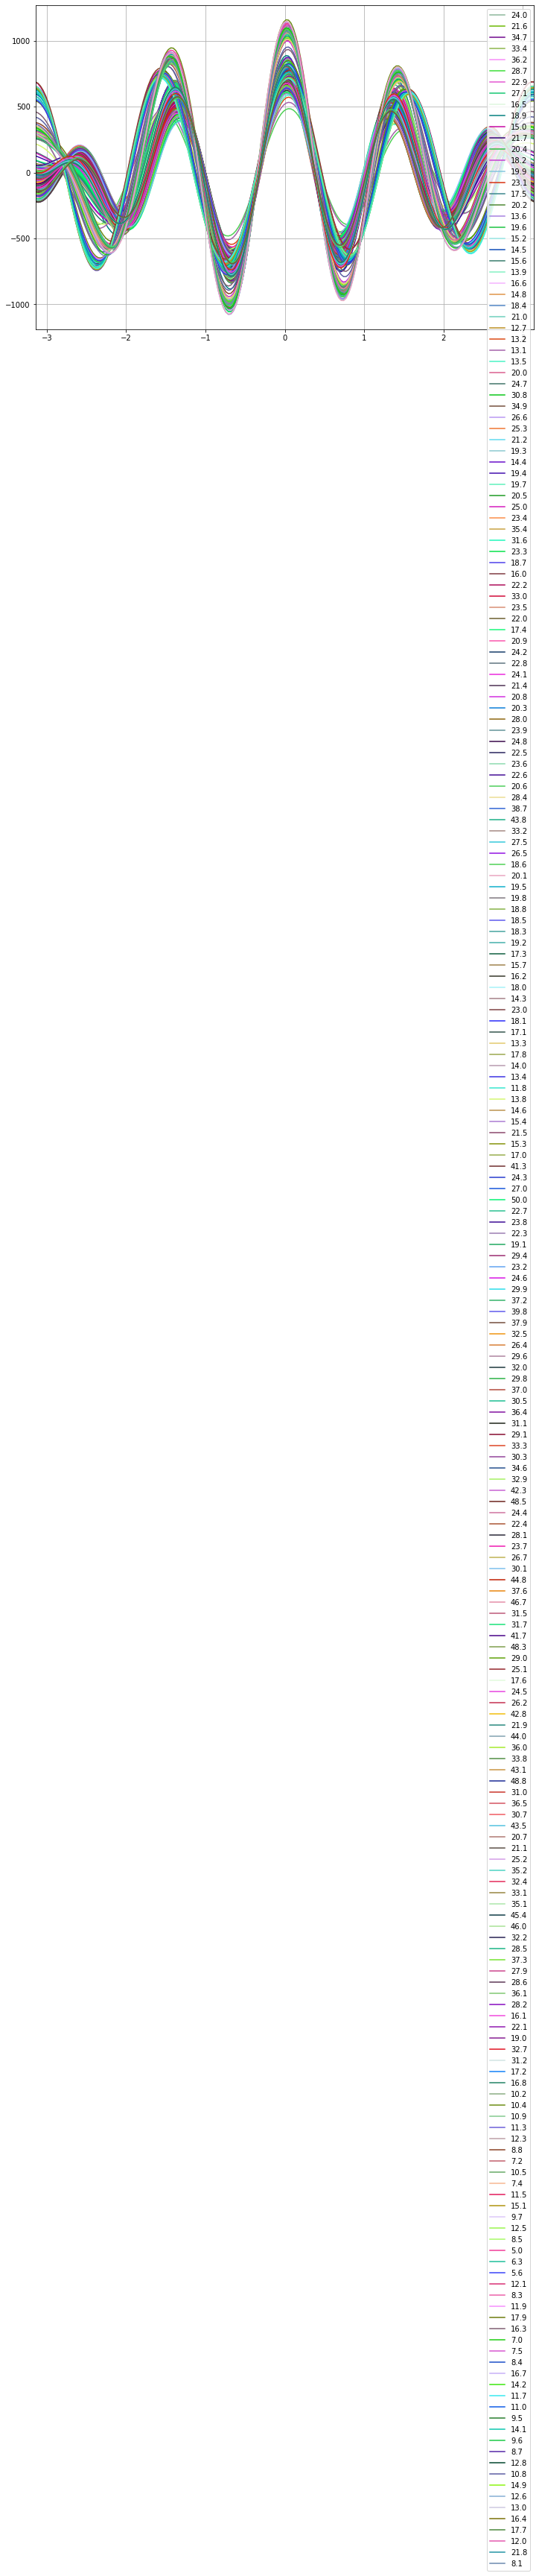

In [42]:
plt.figure(figsize=(12,8))

plotting.andrews_curves(dataset.drop('NOX',axis = 1),'MEDV')

**Preprocessing of data LabelEncoding**

In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['CHAS'] = le.fit_transform(dataset['CHAS'])

**Value Count**

In [107]:
dataset['CHAS'].value_counts()

0     452
1      34
20      1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
21      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
10      1
Name: CHAS, dtype: int64

**Count plot**

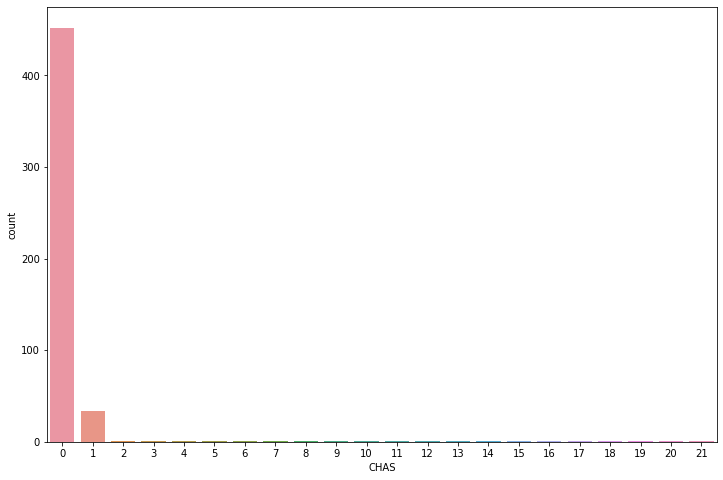

In [110]:
plt.figure(figsize=(12,8))
sns.countplot(dataset['CHAS'], label = 'count')

**Preprocessing of data MinMaxScaler**

In [84]:
from sklearn.preprocessing import MinMaxScaler

feature_cols = ['AGE','MEDV','CRIM',]
sc = MinMaxScaler()
dataset[feature_cols] = sc.fit_transform(dataset[feature_cols])

**Training and testing of data**

In [93]:
from sklearn.model_selection import train_test_split

x = dataset[feature_cols]
y = dataset['CHAS']
x = np.nan_to_num(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

**Dimensions**

In [94]:
print('X_train shape : ',x_train.shape)
print('X_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (354, 3)
X_test shape :  (152, 3)
y_train shape :  (354,)
y_test shape :  (152,)


**Using Random Forest**

In [95]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators = 100)
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy Score :',accuracy_score(y_test, y_pred)*100)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred), sep='\n')

Accuracy Score : 89.47368421052632
Confusion Matrix :
[[136   4   0   0]
 [ 10   0   0   0]
 [  1   0   0   0]
 [  1   0   0   0]]


**Using Logistic Regression**

In [100]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy Score :',accuracy_score(y_test, y_pred)*100)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred), sep='\n')

Accuracy Score : 92.10526315789474
Confusion Matrix :
[[140   0   0   0]
 [ 10   0   0   0]
 [  1   0   0   0]
 [  1   0   0   0]]


**Using KNN**

In [103]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy Score :',accuracy_score(y_test, y_pred)*100)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred), sep='\n')

Accuracy Score : 88.1578947368421
Confusion Matrix :
[[133   7   0   0]
 [  9   1   0   0]
 [  1   0   0   0]
 [  1   0   0   0]]


**Using Naive Bayes**

In [105]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy Score :',accuracy_score(y_test, y_pred)*100)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred), sep='\n')

Accuracy Score : 90.78947368421053
Confusion Matrix :
[[137   3   0   0]
 [  9   1   0   0]
 [  1   0   0   0]
 [  1   0   0   0]]
